# Decision Tree

like rule based system

## Steps

1. place best feature of the dataset at the root of the tree
1. split training set into subsets
1. Repeat on each subset until find a leaf node

### How to find best feature ?

We have 3 criteria in decision tree to find the best feature, these are

1. Entropy

    It is Randomness in the data

    Entropy = $ - \sum P(X) \cdot \log_2(P(X))$
    
    Which feature having less entropy it can be root node


1. Information Gain

    It calculates how much information a feature provides us about a class

    ```
    Information Gain = Entropy(Dataset) - {Weighted Avg * Entropy(Feature)}
    ```
    

1. Gini Indexing

    Gini index is a measure of impurity or purity used while creating a decision tree in the algorithm
    
    Gini index = $ 1 - \sum P(X)^2$
    
    An attribute with the low Gini index should be preferred as compared to the high Gini index.

In [3]:
!pip install mlxtend --upgrade --no-deps
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 145.7 kB/s eta 0:00:001m134.0 kB/s eta 0:00:01


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz # export_graphviz function creates a GraphViz representation of the decision tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import graphviz    # graphviz is a graphical vizualisation of graph objects
import os
import warnings
warnings.filterwarnings("ignore")

In [31]:
df = pd.read_csv("fruits_weight_sphercity.csv")
df.head()

,Color,Weight,Sphericity,labels
0,Red,200,0.40,apple
1,Orange,320,1.00,orange
2,Orange,310,0.95,orange
3,Red,220,0.45,apple
4,Red,230,0.50,apple


In [32]:
df.shape

(69, 4)

In [33]:
df['Color'].unique()

array(['Red', 'Orange', 'Greenish yellow', 'Green', 'Reddish yellow'],
      dtype=object)

In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Color'] = label_encoder.fit_transform(df['Color'])
df['labels'] = label_encoder.fit_transform(df['labels'])
df.head()

,Color,Weight,Sphericity,labels
0,3,200,0.40,0
1,2,320,1.00,1
2,2,310,0.95,1
3,3,220,0.45,0
4,3,230,0.50,0


In [35]:
df['Color'].unique()

array([3, 2, 1, 0, 4])

In [41]:
df['labels'].unique()

array([0, 1])

In [42]:
X = df[["Sphericity", "Weight"]].values
y = df["labels"].values

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [44]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9285714285714286

In [45]:
y_train

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1])

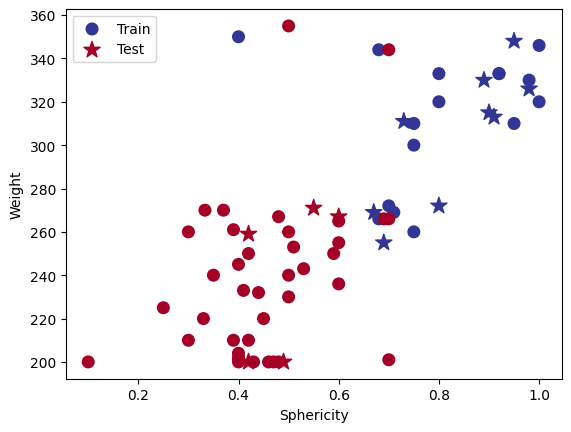

In [46]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='RdYlBu', s=70, label="Train") # S is marker size
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='RdYlBu', marker="*", s=150, label="Test")
plt.xlabel("Sphericity")
plt.ylabel("Weight")
plt.legend(loc='upper left')
plt.show()

Training Accuracy: 0.93   Testing Accuracy: 0.86   at Depth: 1


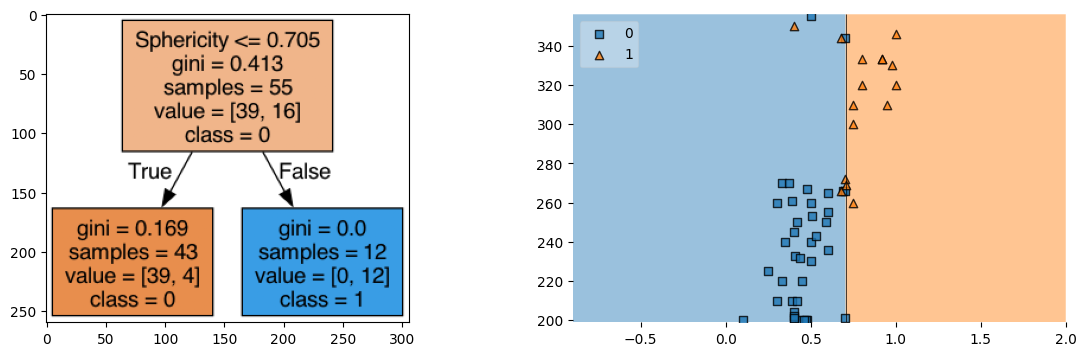

Training Accuracy: 0.95   Testing Accuracy: 0.86   at Depth: 2


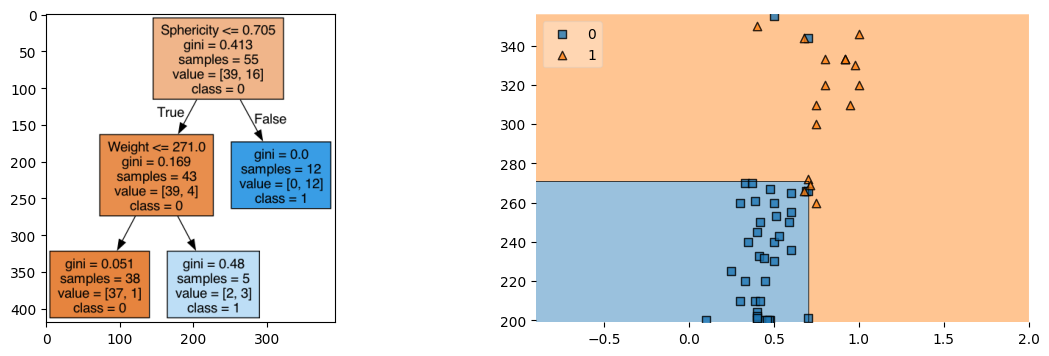

Training Accuracy: 0.96   Testing Accuracy: 0.86   at Depth: 3


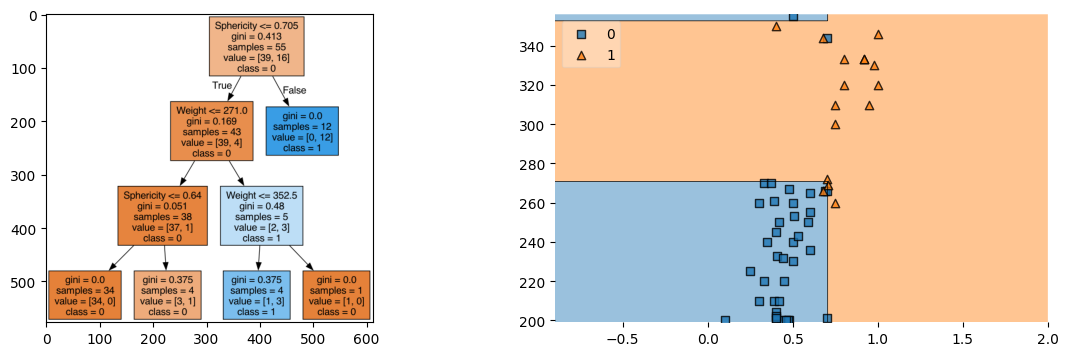

In [47]:
for depth in range(1, 4):

    # max_depth parameter regularize the tree, or limit the way it grows to prevent over-fitting
    # random_state generates the same sequence of random numbers everytime of the code execution
    dt = DecisionTreeClassifier(criterion = 'gini', max_depth = depth)

    # Fitting the data
    dt = dt.fit(X_train, y_train)
    training_acc = accuracy_score(dt.predict(X_train),y_train)
    testing_acc = accuracy_score(dt.predict(X_test),y_test)
    print("Training Accuracy:", round(training_acc,2)," ","Testing Accuracy:", round(testing_acc,2), " ", "at Depth:",depth)


    # plt.subplots() function returns a tuple containing a figure and axes objects
    fig,ax =  plt.subplots(1,2,figsize=(14,4))

    # Exporting the model into a dot file
    saveAs = "Fruits_" + str(depth)
    save_dot = saveAs + ".dot"
    save_png = saveAs + ".png"

    # Plot the GraphViz representation of the decision tree
    graph = graphviz.Source(export_graphviz(dt, out_file=save_dot,feature_names= ["Sphericity","Weight"], class_names=['0', '1'],filled = True))
    os.system("dot -T png -o " + save_png + " " + save_dot)
    ax[0].imshow(plt.imread(save_png))

    # Plot the decision boundary
    plot_decision_regions(X_train, y_train, clf=dt, legend=2)
    plt.show()

In [48]:
!pip install dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 294.7 kB/s eta 0:00:00 kB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.3/325.3 kB 872.2 kB/s eta 0:00:001m844.8 kB/s eta 0:00:01


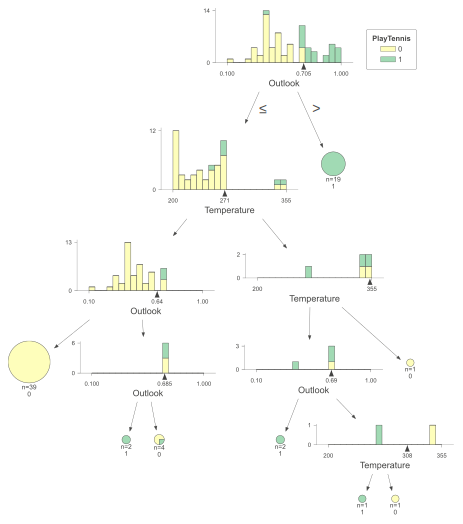

In [53]:
import dtreeviz
viz = dtreeviz.model(model,X_train=X,y_train=y,target_name='PlayTennis',feature_names=['Outlook', 'Temperature', 'Humidity', 'Wind'],class_names=[0,1])
viz.view()

In [54]:
# import numpy as np
# def gini_index(dis):
#   prob = np.array(dis)
#   return 1 - np.sum(prob**2)

# https://colab.research.google.com/drive/1NGN6jACvQDcfLaDJFcCCwYHKjt-cu6z-#scrollTo=NeVvGJg7-tqd

Advantages

1. Fast
1. Handle categorical columns (y -> can be string)
1. Interceptable as a set of rules
1. Indicates most useful feature

Disadvantages

1. Does not handle non-rectangular region well
1. Computationally expensive to train
1. Tends to overfit

Early stopping - do not split beyond a limit, set max-depth = some value

Pruning - once tree is formed, remove the weakest branch, use validation set to decide when to stop


In [ ]:
# import numpy as np

# for i in range(1, 20):
#   dt_model = DecisionTreeClassifier(max_depth=i, criterion='gini')
#   dt_model.fit(X_train, y_train)
#   y_pred = dt_model.predict(X_test)

#   accuracy = accuracy_score(y_test, y_pred)

#   train_accuracy = accuracy_score(y_train, dt_model.predict(X_train))
#   # test_accuracy = dt_model.score(X_test, y_test)

#   print(f'{i}: \t Test: {np.round(accuracy, 2)} \t Train: {np.round(train_accuracy, 2)}')

# # at max depth 9 we got best accuracy of 91% after that model is over fitted

In [57]:
dt_model_1 = DecisionTreeClassifier(max_depth=10, criterion='entropy')
dt_model_1.fit(X_train, y_train)
y_pred = dt_model_1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(accuracy) # 0.9015748031496063

0.8571428571428571


In [59]:
!pip install lightgbm
!pip install lazypredict

  Using cached lightgbm-4.2.0.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for lightgbm (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [45 lines of output]
      2024-01-05 22:54:43,293 - scikit_build_core - INFO - CMake version: 3.28.1
      *** scikit-build-core 0.7.1 using CMake 3.28.1 (wheel)
      2024-01-05 22:54:43,296 - scikit_build_core - INFO - Build directory: /private/var/folders/4k/7cfx1f1x42bfv3nvmg5rhfc80000gr/T/tmp981wiflh/build
      *** Configuring CMake...
      2024-01-05 22:54:43,732 - scikit_build_core - INFO - Ninja version: 1.11.1
      2024-01-05 22:54:43,733 - scikit_build_core - WARNING - libdir/ldlibrary: /opt/homebrew/opt/python@3.10/Frameworks/Python.framework/Versions/3.10/lib/Python.framework/Versions/3.10/Python is not a real fil